In [2]:
import sys; sys.path.insert(0, "..") 
import os
import matplotlib.pyplot as plt

In [1]:
import pandas as pd

df = pd.read_csv("../data/unzip_filenames.csv")

In [3]:
df.describe()

,patient_id,scan_id,n_slice
count,4178.000000,4178.000000,4178.000000
mean,1409.942317,2493.779799,98.499043
std,1036.261727,1528.372355,75.422498
min,0.000000,90.000000,16.000000
25%,512.000000,1242.250000,56.000000
50%,1363.500000,2313.500000,70.000000
75%,1868.750000,3640.750000,128.000000
max,4044.000000,5779.000000,690.000000


In [44]:
from sklearn.datasets import make_blobs

X, labels = make_blobs(n_samples=100, centers=2, n_features=2,random_state=0)
x = [X[_][0] for _ in range(100)]
y = [X[_][1] for _ in range(100)]

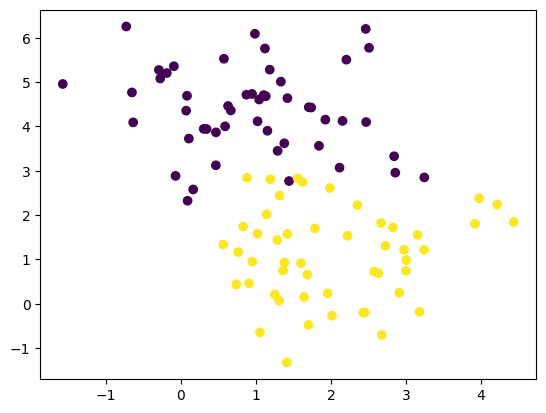

In [45]:
plt.scatter(x=x, y=y, c=labels)

In [88]:
import torch.nn as nn

import baal.bayesian.dropout

class ToyModel(nn.Module):
    def __init__(self) -> None:
        super(ToyModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 8),
            nn.ReLU(),
            nn.Linear(8, 8),
            nn.ReLU(),
            baal.bayesian.dropout.Dropout(p=0.5),
            nn.Linear(8, 8),
            nn.ReLU(),
            baal.bayesian.dropout.Dropout(p=0.5),
            nn.Linear(8, 2)
        )
    def forward(self, x):
        return self.model(x)

In [122]:
import numpy as np
import torch
import torch.optim as optim

model = ToyModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

for epoch in range(200):  # loop over the dataset multiple times
    preds = []
    running_loss = 0.0
    for x, y in zip(X, labels):
        x = torch.tensor(x).type(torch.float32)
        y = torch.tensor(y).type(torch.long)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(x.unsqueeze(0))
        loss = criterion(outputs, y.unsqueeze(0))
        loss.backward()
        optimizer.step()
        preds.append(torch.argmax(outputs))
        # print statistics
        # print(f'[{epoch + 1}, {epoch + 1:5d}] loss: {loss.item()}')
    print((np.hstack(preds)==labels).mean())
print('Finished Training')

0.51
0.52
0.55
0.59
0.59
0.61
0.68
0.63
0.59
0.63
0.66
0.69
0.71
0.69
0.74
0.7
0.68
0.66
0.69
0.75
0.72
0.7
0.66
0.63
0.7
0.65
0.78
0.66
0.63
0.72
0.68
0.76
0.74
0.74
0.72
0.55
0.64
0.62
0.62
0.7
0.73
0.61
0.7
0.69
0.64
0.68
0.66
0.64
0.69
0.74
0.67
0.69
0.71
0.67
0.7
0.74
0.67
0.67
0.71
0.73
0.66
0.71
0.72
0.68
0.63
0.68
0.71
0.66
0.68
0.69
0.69
0.64
0.76
0.8
0.67
0.68
0.76
0.67
0.74
0.8
0.83
0.76
0.78
0.8
0.88
0.81
0.88
0.83
0.76
0.86
0.89
0.87
0.84
0.89
0.83
0.81
0.82
0.84
0.76
0.85
0.86
0.79
0.79
0.8
0.83
0.83
0.8
0.78
0.86
0.87
0.82
0.83
0.8
0.84
0.81
0.87
0.86
0.79
0.87
0.8
0.85
0.88
0.79
0.88
0.84
0.81
0.83
0.79
0.82
0.81
0.83
0.86
0.84
0.83
0.87
0.81
0.84
0.88
0.82
0.82
0.9
0.85
0.84
0.85
0.84
0.83
0.88
0.87
0.83
0.81
0.83
0.88
0.87
0.84
0.84
0.84
0.83
0.83
0.84
0.84
0.88
0.86
0.86
0.78
0.87
0.82
0.82
0.84
0.79
0.85
0.87
0.82
0.83
0.82
0.79
0.79
0.84
0.78
0.91
0.81
0.79
0.84
0.86
0.87
0.86
0.9
0.81
0.81
0.84
0.87
0.88
0.83
0.87
0.85
0.77
0.88
0.82
0.85
0.83
0.91
Finished Traini

In [123]:
from baal.modelwrapper import ModelWrapper

wrapped_model = ModelWrapper(
    model,
    torch.nn.CrossEntropyLoss()
)
with torch.no_grad():
    predictions = wrapped_model.predict_on_batch(torch.tensor(X).type(torch.float32), iterations=10000)

In [124]:

predictions.shape

torch.Size([100, 2, 10000])

In [134]:
predictions[0, :, :]

tensor([[-0.9994, -3.2828, -2.1662,  ...,  0.7026, -1.9507, -5.8139],
        [ 1.6842,  1.5749,  3.4188,  ..., -0.2233,  2.0847,  4.9044]])

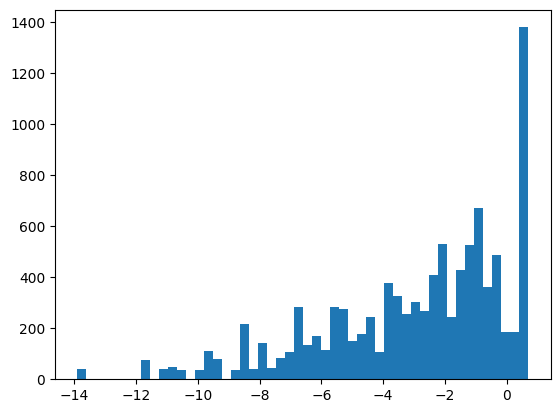

In [127]:


import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.hist(predictions[0, 0, :].numpy(), bins=50)
plt.show()


In [ ]:
model.train()
uncertainty_predictions = 
for x, label in zip(X, labels):
    for _ in range(40):
        x = torch.tensor(x).type(torch.float32)
        y = model(x)
        preds.append(torch.argmax(y))

In [4]:
from src.dataset.dataset import Data
dataset = Data(data_path="../data/NPY/volumes/", target_path="../data/NPY/labels/")
